Populating the interactive namespace from numpy and matplotlib


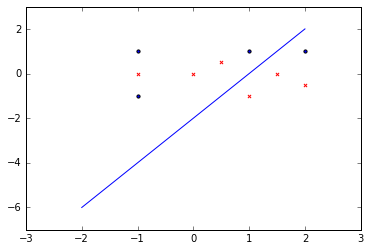

In [37]:
# code sources 
# http://terrence.logdown.com/posts/290508-python-simple-perceptron-learning-algorithm-implementations

%pylab inline
import matplotlib.pyplot as plt
import numpy as np

# dataset for question i
DATASET_I = np.array([
        ((1, -1, -1), 1), 
        ((1, 2, 1), -1), 
        ((1, 1, 1), 1), 
        ((1, -1, 1), 1), 
        ((1, 1, -1), -1)
    ])

# dataset for question ii: XOR dataset
DATASET_II = np.array([
        ((1, 0, 0), 0), 
        ((1, 0, 1), 1), 
        ((1, 1, 0), 1), 
        ((1, 1, 1), 0)
    ])

# dataset for question iii: add to question i
DATASET_III = np.concatenate((DATASET_I, np.array([
        ((1, 0, 0), 1), 
        ((1, 0.5, 0.5), -1), 
        ((1, 1.5, 0), -1), 
        ((1, 2, -0.5), -1), 
        ((1, -1, 0), 1)
    ])))


def check_error(w, dataset):
    result = None
    error = 0
    for x, s in dataset:
        x = np.array(x)
        if int(np.sign(w.T.dot(x))) != s:
            result = x, s
            error += 1
    #print  "error=%s/%s" % (error, len(dataset))
    return result

# perceptron learning
def pla(dataset):
    w = np.zeros(3)
    l = 0
    while check_error(w, dataset) is not None:
        x, s = check_error(w, dataset)
        w += s * x
        l = l + 1
        if (l == 1000): # set the limit of iteration count to avoid infinite loop
            break
    return w

dataset = DATASET_III
w = pla(dataset)

# visualization
ps = [v[0] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([v[1] for v in ps[:4]], [v[2] for v in ps[:4]], s=10, c='b', marker="o", label='O')
ax1.scatter([v[1] for v in ps[4:]], [v[2] for v in ps[4:]], s=10, c='r', marker="x", label='X')
l = np.linspace(-2, 2)
a,b = -w[1]/w[2], -w[0]/w[2]
ax1.plot(l, a*l + b, 'b-')
#plt.legend(loc='upper left')
plt.show()